# Sentiments On Crowd-Flower Brands and Products

# Table of contents

[1. Business Understanding](#1.-Business-Understanding) </br>
[1.1 Business Description](#1.1-Business-Description) </br>
[1.2 Problem Statement](#1.2-Problem-Statement) </br>
[1.3 Main Objective](#1.3-Main-Objective) </br>
[1.4 Specific Objectives](#1.4-Specific-Objectives) </br>
[2. Importing Libraries And Warnings](#2.-Importing-Libraries-And-Warnings) </br>
[3. Data Understanding](#3.-Data-Understanding) </br>
[3.1 Information about the columns](#3.1-Information-About-The-Columns)</br>
[4. Data Preparation](#4.-Data-Preparation) </br>
[4.1 Visualizing Before Cleaning](#4.1-Visualizing-Before-Cleaning) </br>
[4.2 Renaming The Columns](#4.2-Renaming-The-Columns) </br>
[4.3 Missing Values](#4.3-Missing-Values) </br>
[4.4 Duplicates](#4.4-Duplicates) </br>
[4.5 Place Holders](#4.5-Place-Holders) </br>
[4.6 White Space](#4.6-White-Space) </br>
[4.7 Visualizing After Cleaning](#4.7-Visualizing-After-Cleaning) </br>
[5. EDA](#5.-EDA) </br>
[6. Data Preprocessing](#6.-Data-Preprocessing) </br>
[7. Data Modelling](#7.-Data-Modelling) </br>
[8. Evaluation](#8.-Evaluation) </br>
[9. Recommendations](#9.-Recommendations) </br>
[10. Conclusions](#10.-Conclusions) </br>
[11. Challenges](#11.-Challenges)

# 1. Business Understanding

## 1.1 Business Description

In the competitive landscape of today's market, establishing a profound connection between products or services and the emotions of the target audience is a strategic imperative. Emotional branding offers the potential to cultivate brand loyalty, trust, and differentiation. </br>
To harness the power of emotional branding, businesses must accurately gauge public sentiment towards their offerings, ensuring that the emotional connection aligns with their brand vision. By analyzing various sources of customer feedback, such as social media posts, sentiment analysis can determine whether the sentiment of the feedback is positive, negative, or neutral. </br>
Employing sentiment analysis can lead to data-driven decisions, improving overall performance and reputation, and resulting in increased profitability and success.

## 1.2 Problem Statement

Emotional branding, a strategy centered on evoking specific emotions in customers, has become a critical driver of brand loyalty and differentiation. Establishing a deep emotional connection between brands and consumers is essential. </br>
However, the challenge lies in accurately assessing and aligning a brand's emotional resonance with customer sentiment in real-time. To address this challenge, this project seeks to develop a sentiment analysis solution that deciphers the emotions expressed in tweets related to Apple and Google products. </br>
The aim to equip businesses shareholders with actionable insights to strategically employ emotional branding and strengthen their brand-consumer relationships. The ultimate goal is to empower organizations to enhance customer loyalty, trust, and competitiveness by aligning their products with the emotions of their target audience.

## 1.3 Main Objective

To use Natural Language processing to build models which can rate a sentiment on Google and Apple based on tweets.

## 1.4 Specific Objectives

a. To use both NLP and deep learning models to classify tweets into positive, neutral and negative.</br>
b. To visualize sentiment analysis, gain insights from them hence evaluate model performances to conlude informed decisions,</br>
c. Understanding and preprocessing dataset of tweets related to google and apple products.

# 2. Importing Libraries And Warnings

In [1]:
# Imports
import re
import nltk
import string
import random
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
nltk.download('wordnet')
from nltk import FreqDist
from textblob import TextBlob
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from keras.optimizers import Adam
from gensim.models import Word2Vec
from collections import defaultdict
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras import initializers, regularizers, constraints, optimizers, layers, models
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D, GRU

[nltk_data] Downloading package wordnet to /home/muchiri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2023-09-16 15:21:28.096993: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 15:21:28.148349: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 15:21:28.149387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 15:21:29.184554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 3. Data Understanding

In [2]:
# loading the data
df = pd.read_csv("Data/crowdflower-brands-and-product-emotions/original/judge-1377884607_tweet_product_company.csv", encoding = "latin1")
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
# checking the columns
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [4]:
# checking the unique values in the emotion_in_tweet_is_directed_at column
df["emotion_in_tweet_is_directed_at"].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [5]:
# checking the uniques values in is_there_an_emotion_directed_at_a_brand_or_product column
df["is_there_an_emotion_directed_at_a_brand_or_product"].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

## 3.1 Information About The Columns

* tweet_text - It contains information about the text
  
* emotion_in_tweet_is_directed_at - It contains information about the brand </br>
  i.e; </br>
  Apple </br>
  iPhone </br>
  Android App </br>
  Google Android </br>
  iPad or iPhone App </br>
  Other Apple product or service </br>
  Other Google product or service </br>
  
* is_there_an_emotion_directed_at_a_brand_or_product (will be used as the target) - It contains information about the emotion towards a    given brand </br>
  i.e; </br>
  I can't tell </br>
  Positive emotion </br>
  Negative emotion </br>
  No emotion toward brand or product </br>

In [6]:
# data types of the column values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
# summarily statistics
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [8]:
# Checking the shape of our data
df.shape

(9093, 3)

In [9]:
# checking the type of values 
df.value_counts(dropna = False)

tweet_text                                                                                                      emotion_in_tweet_is_directed_at  is_there_an_emotion_directed_at_a_brand_or_product
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw               NaN                              No emotion toward brand or product                    4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW               NaN                              No emotion toward brand or product                    3
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw  Google                           Positive emotion                                      3
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW  NaN                              No emotion toward brand or product                    3


# 4. Data Preparation

## 4.1 Visualizing Before Cleaning

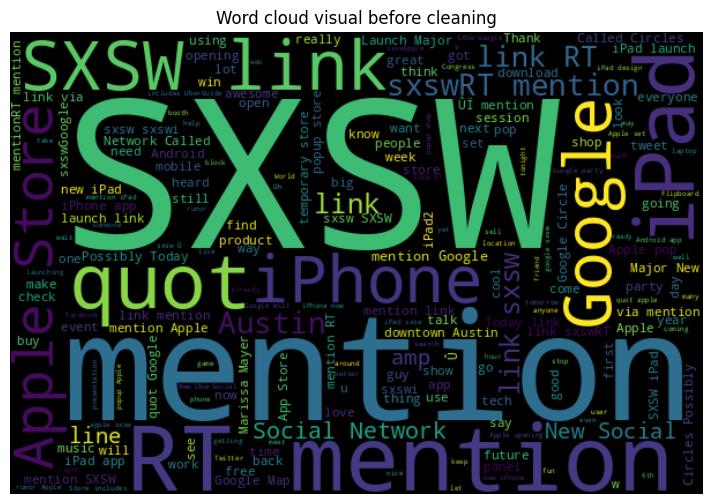

In [10]:
# converting tweet_text values into string to enable plotting of the word cloud
df["tweet_text"] = df["tweet_text"].astype(str)

# plot the figure size
plt.figure(figsize = (10, 6))

# generate a word cloud from the data
word_cloud = WordCloud(width = 600, height = 400).generate("".join(df["tweet_text"]))

# plotting
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title("Word cloud visual before cleaning")
plt.axis("off")

# displaying the word count
plt.show()

It seems some words do appear more frequent than others: </br>
More frequently appearing words: </br>
1. SXSW </br>
2. mention </br>
3. Google </br>
Less frequently appearing words: </br>
i. block </br>
ii. facebook </br>
iii. well </br>
iv. let </br>
v. come </br>

### Disclaimer: Most less frequently appearing words are stop words which will be dealt with in a few </br>
### N/B: Will see if there will be changes in the word cloud after data cleaning

## 4.2 Renaming The Columns

In [11]:
# renaming the columns 
"""
The columns names are too wordy and complex. 
It's better to keep them short but sensible
"""
df.rename(columns = {"tweet_text" : "tweet" , "emotion_in_tweet_is_directed_at" : "brand", \
                     "is_there_an_emotion_directed_at_a_brand_or_product" : "emotion"}, inplace = True)

# display the first 5 rows
df.head()

,tweet,brand,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## 4.3 Missing Values

In [12]:
# checking missing values and their sum
df.isna().sum()

tweet         0
brand      5802
emotion       0
dtype: int64

In [13]:
"""
brand column seems to have missing values. 

However, they can't be discarded simply because they are missing values.

Some missing values have meanings. Others are related to other columns in a meaninful way. Others are too many such that they encompass
almost the entire column.

Best practice is to confirm what these missing values are to know how best to deal with them.
"""

"\nbrand column seems to have missing values. \n\nHowever, they can't be discarded simply because they are missing values.\n\nSome missing values have meanings. Others are related to other columns in a meaninful way. Others are too many such that they encompass\nalmost the entire column.\n\nBest practice is to confirm what these missing values are to know how best to deal with them.\n"

In [14]:
# checking brand column missing values percentage
# length of the brand column missing values
brand_missing_len = df["brand"].isna().sum()

# length of the entire column
brand_len = len(df["brand"])

# percentage of missing values in the column
perc_brand = (brand_missing_len / brand_len) * 100

# rounding of the percentage to the nearest 4 d.p
rounded_perc_brand = round(perc_brand, 4)

# showing the results
print("percentage of missing values in brand column:", rounded_perc_brand)

percentage of missing values in brand column: 63.8073


In [15]:
"""
64% of missing values is a lot to be dropped. An investigation is required here!
checking if the missing values are related in any way to the other columns.
This will help in knowing what type of missing values they are and the appropriate step to take.
"""

# selecting rows which have missing values in brand column
brand_missing = df[df["brand"].isna()]

In [16]:
# selecting rows in tweet column which have nan values in brand columns
print(brand_missing["tweet"].value_counts(dropna = False))

RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                  4
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                     3
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                  3
Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                              2
RT @mention ÷¼ Happy Woman's Day! Make love, not fuss! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter      2
                                                                                                                                  ..
My kind of #sxsw - iPhone plugged into a tree.  @mention The Salt Lick {link}                                                      1
Reports of @mention introducing a new social media platform at #SXSW 

In [17]:
# selecting rows in emotion column which have nan values in brand columns
print(brand_missing["emotion"].value_counts(dropna = False))

No emotion toward brand or product    5298
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: emotion, dtype: int64


## Interpretation

In [18]:
"""
The fact that rows having "No emotion toward brand or product" are the most common with nan values in the brand column makes "sense" 
because the column was supposed to show emotions. If there is none, it means the there is no product/brand there in the brand column.
The best approach in this case would be to rebrand the nan values as "no brand"
"""

'\nThe fact that rows having "No emotion toward brand or product" are the most common with nan values in the brand column makes "sense" \nbecause the column was supposed to show emotions. If there is none, it means the there is no product/brand there in the brand column.\nThe best approach in this case would be to rebrand the nan values as "no brand"\n'

In [19]:
# Filling the missing values using "no brand"
df["brand"].fillna("no brand", inplace = True)

# checking the values of the brand column
print(df["brand"].value_counts(dropna = False))

# spacing out things
print(" ")

# checking if there are any missing values
print("number of missing values:", df["brand"].isna().sum())

no brand                           5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: brand, dtype: int64
 
number of missing values: 0


In [20]:
"""
All good. No missing values in the columns.
"""

'\nAll good. No missing values in the columns.\n'

## 4.4 Duplicates

In [21]:
# check for any duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9088    False
9089    False
9090    False
9091    False
9092    False
Length: 9093, dtype: bool

In [22]:
# check number of duplicates
df.duplicated().sum()

22

In [23]:
"""
The duplicates are quite small i.e 22
They can be dropped
"""
df.drop_duplicates(inplace = True)

# checking if there are any more duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [24]:
"""
All is good. No duplicates in the columns
"""

'\nAll is good. No duplicates in the columns\n'

## 4.5 Place Holders

In [25]:
# checking for place holders
for column in df.columns:
    print(df[column].value_counts(dropna = False))

RT @mention RT @mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link}    2
Win free ipad 2 from webdoc.com #sxsw RT                                                                                                     2
Win free iPad 2 from webdoc.com #sxsw RT                                                                                                     2
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                               2
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                               2
                                                                                                                                            ..
What matters most: {link} It's all in the title!!! #touchingstories #iPad and/or #tablet #SXSW                                               1

In [26]:
"""
Only the tweet column seems to have place holders. i.e # ? / e.t.c
A function can be written with findall() method to search for all placeholders and subsequently remove them.
"""
# function to search and remove placeholders in tweet column
def tweet_text(text):
    # creating a basic pattern to search through the file for any instances that match the place holders
    pattern = r"[^\w\s]"

    # compile the pattern
    p = re.compile(pattern)

    # use findall() method o look for any place holders
    placeholders = re.findall(p, text)

    # remove all placeholders by replacing them with and empty space
    cleaned_text = re.sub(p, " ", text)

    # return the cleaned text without placeholders
    return cleaned_text
    
# checking if there any placeholders anymore
df["tweet"] = df["tweet"].apply(tweet_text)
df["tweet"].value_counts(dropna = False)

 mention at  sxsw   quot apple comes up with cool technology no one s ever heard of because they don t go to conferences quot   via  mention    2
Win free iPad 2 from webdoc com  sxsw RT                                                                                                        2
 SXSW Google to Launch Major New Social Network Called Circles  Possibly Today by  mention  link  via  mention                                  2
RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   SXSW                                  2
RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   sxsw                                  2
                                                                                                                                               ..
What matters most   link  It s all in the title     touchingstories  iPad and or  tablet  SXSW                              

In [27]:
"""
All is good. No placeholders in the columns
"""

'\nAll is good. No placeholders in the columns\n'

## 4.6 White Space

In [28]:
# Checking for white space
df_whitespace = [col for col in df.columns if col.strip() != col]
print("Columns with whitespace:", df_whitespace)

Columns with whitespace: []


## 4.7 Visualizing After Cleaning

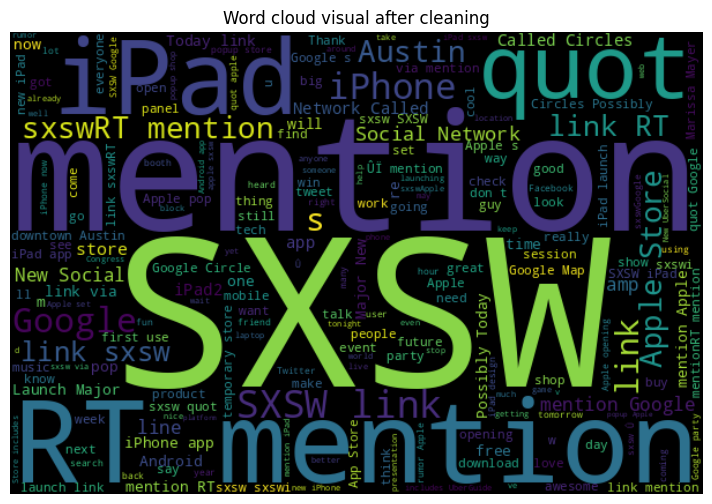

In [29]:
# convert tweet_text values into string to enable plotting of the word cloud
df["tweet"] = df["tweet"].astype(str)

# plot the figure size
plt.figure(figsize = (10, 6))

# generate a word cloud from the data
word_cloud = WordCloud(width = 600, height = 400).generate("".join(df["tweet"]))

# plot
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title("Word cloud visual after cleaning")
plt.axis("off")

# display the wordcloud
plt.show()

### Interpretation

Some words are quite constitent </br>
Most frequent words:
1. sxsw
2. link
3. mention </br>
Less frequent words: </br>
i. free </br>
ii. ipad </br>
iii. app </br>
</br>
Data is clean ready for next steps i.e Eda...

# 5. EDA

## 5.1 Univariate analysis

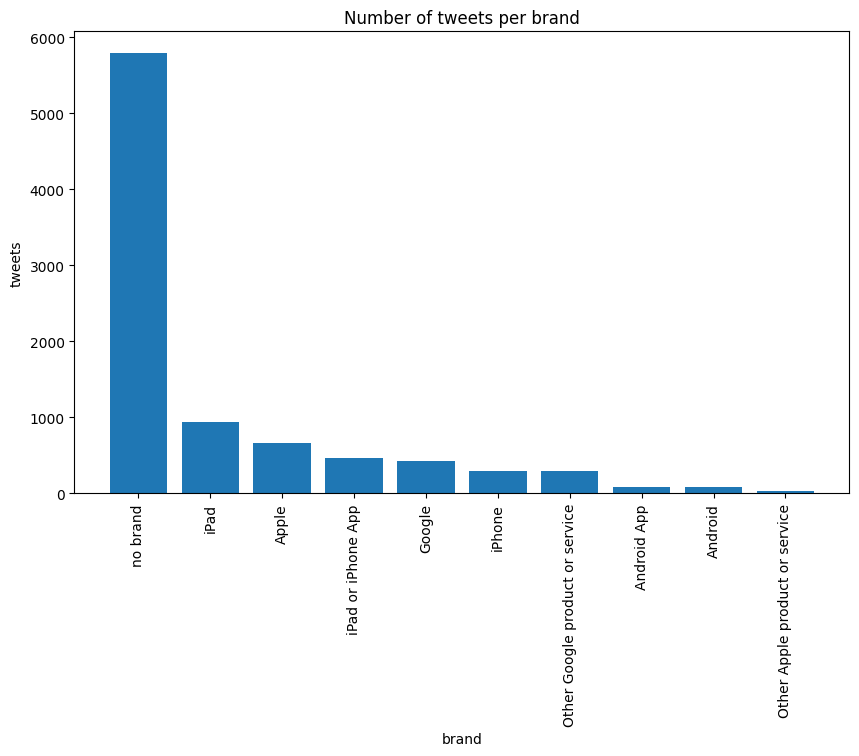

In [30]:
"""
Visual representation of the number of tweets per brand
"""
# plot a figure
plt.figure(figsize = (10, 6))

# defining variables for the bar graph
x = df["brand"].value_counts()
y = x.values

# plot a bar graph
plt.bar(x.index, y)
plt.title("Number of tweets per brand")
plt.xlabel("brand")
plt.ylabel("tweets")

# rotating the x axis to enable readability
plt.xticks(rotation = 90)

# displaying the bar graph
plt.show()

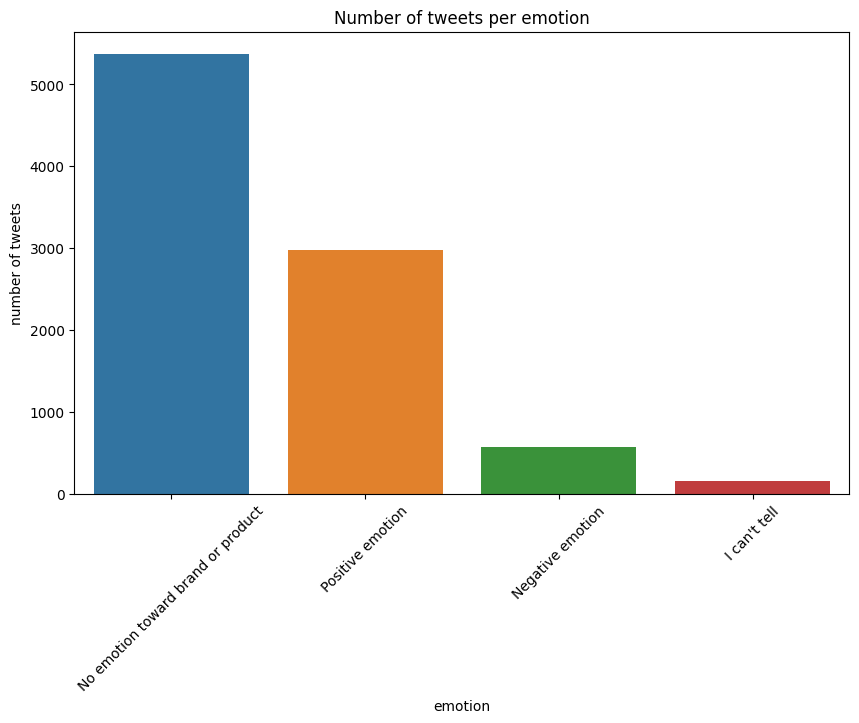

In [31]:
"""
visual representation of the number of tweets per emotion
"""
# plotting the figure size
plt.figure(figsize = (10, 6))
emotions_count = df["emotion"].value_counts()

# plotting the bar plot
sns.barplot(x = emotions_count.index, y = emotions_count.values)

# labelling the bar chart
plt.title("Number of tweets per emotion")
plt.xlabel("emotion")
plt.ylabel("number of tweets")

# rotating the x=axis for readability
plt.xticks(rotation = 45)

# displaying the figure
plt.show()

In [32]:
"""
getting the 10 most common words
"""

# plotting a frequency distribution visual
freqdist = FreqDist(df["tweet"])
most_common = freqdist.most_common(10)

# display the results
most_common

[(' mention at  sxsw   quot apple comes up with cool technology no one s ever heard of because they don t go to conferences quot   via  mention',
  2),
 (' SXSW Google to Launch Major New Social Network Called Circles  Possibly Today by  mention  link  via  mention',
  2),
 ('Win free ipad 2 from webdoc com  sxsw RT', 2),
 ('Win free iPad 2 from webdoc com  sxsw RT', 2),
 ('RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   sxsw',
  2),
 ('RT  mention Marissa Mayer  Google Will Connect the Digital  amp  Physical Worlds Through Mobile    link   SXSW',
  2),
 ('RT  mention RT  mention It s not a rumor  Apple is opening up a temporary store in downtown Austin for  SXSW and the iPad 2 launch  link ',
  2),
 ('  wesley83 I have a 3G iPhone  After 3 hrs tweeting at  RISE_Austin  it was dead   I need to upgrade  Plugin stations at  SXSW ',
  1),
 (' jessedee Know about  fludapp   Awesome iPad iPhone app that you ll likely appreciate for i

<Figure size 1000x600 with 0 Axes>

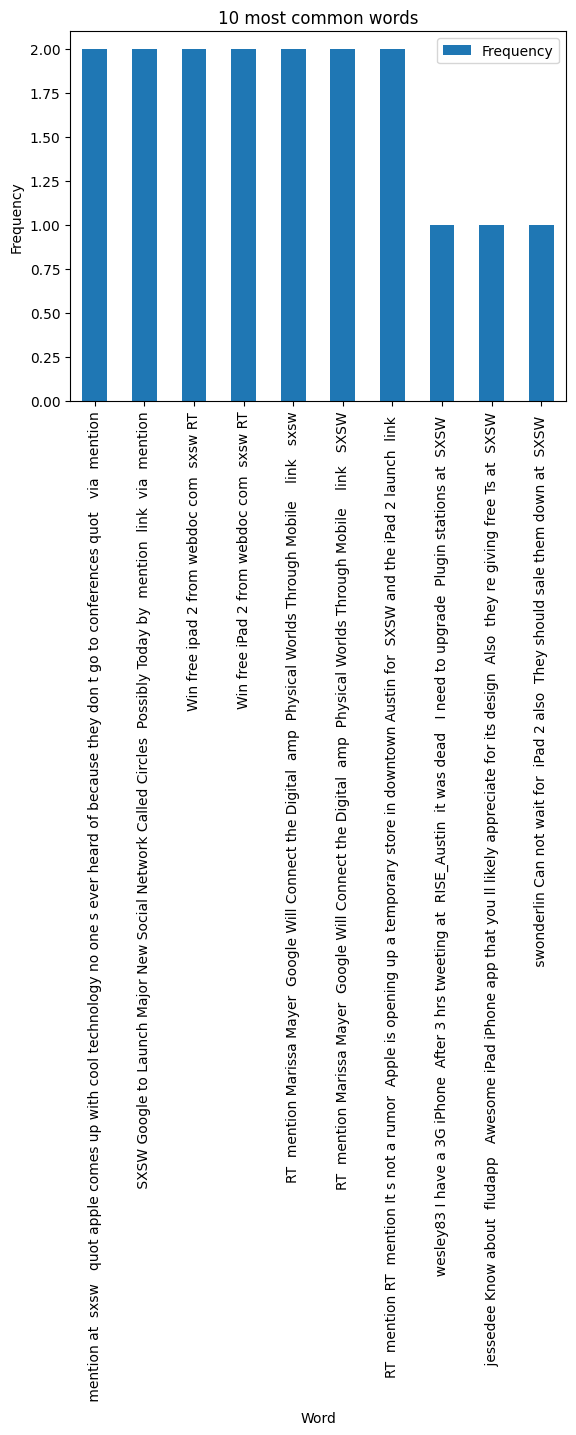

In [33]:
# creating a dataframe for the most common words
most_common_df = pd.DataFrame(most_common, columns = ["Word", "Frequency"])

# plotting the size 
plt.figure(figsize = (10, 6))

# creating a bar graph
most_common_df.plot(kind = "bar", x = "Word", y = "Frequency")

# labelling the bar graph
plt.title("10 most common words")
plt.xlabel("Word")
plt.ylabel("Frequency")

# rotating the x-axis for readbility
plt.xticks(rotation = 90)

# display the visual
plt.tight_layout()
plt.show()

## 5.2 Bivariate analysis

<Figure size 1600x1200 with 0 Axes>

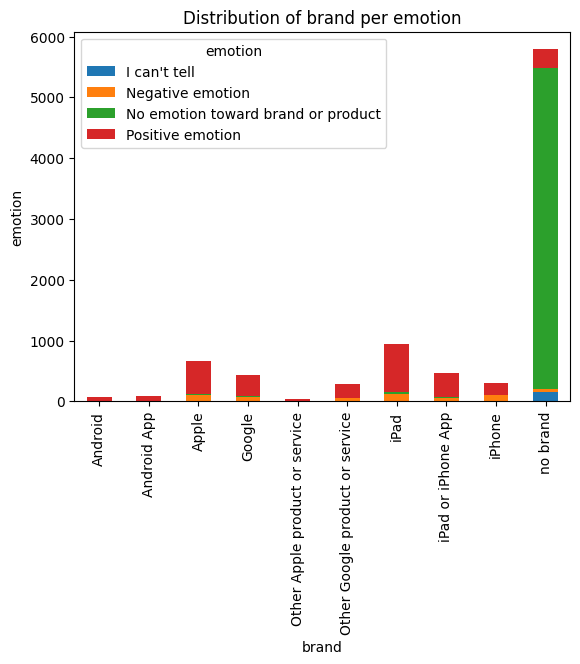

In [34]:
"""
Visual representation of the emotions per brand
"""
# plot a figure
plt.figure(figsize = (16, 12))
x = df.groupby(["brand", "emotion"]).size().unstack(fill_value=0)

# plot a stacked bar chart
x.plot(kind = "bar", stacked = True)

# labelling the bar chart
plt.title("Distribution of brand per emotion")
plt.xlabel("brand")
plt.ylabel("emotion")

# rotating the x-axis the readability
plt.xticks(rotation = 90)

# display the bar chart
plt.show()

## 5. 3 Multivariate analysis

In [35]:
"""
Looking for 10 common words for the positive and negative emotion.

Plotting bar graphs o show how well they appear
"""

'\nLooking for 10 common words for the positive and negative emotion.\n\nPlotting bar graphs o show how well they appear\n'

<Figure size 1000x600 with 0 Axes>

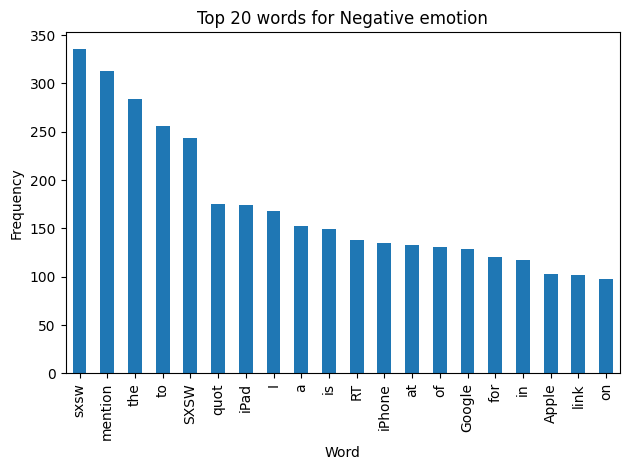

<Figure size 1000x600 with 0 Axes>

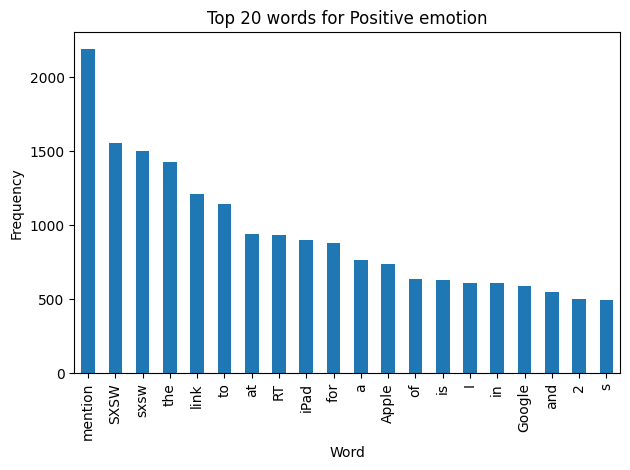

In [36]:
# nitializing dictionarieis to store word frequencies for each emotion
emotion_word_frequencies = defaultdict(lambda: defaultdict(int))

# for loop for iterating through the rows of the DataFrame
for index, row in df.iterrows():
    emotion = row["emotion"]
    tweet_words = row["tweet"].split() 
    
    # for loop to update word frequencies
    for word in tweet_words:
        emotion_word_frequencies[emotion][word] += 1

# defining variables for the emotions 
emotions_to_visualize = ["Negative emotion", "Positive emotion"]

# defining a variable for the number of word
num_top_words = 20

# Creating bar graphs for each emotion
for emotion in emotions_to_visualize:
    word_frequencies = emotion_word_frequencies[emotion]
    sorted_words = sorted(word_frequencies.items(), key = lambda x: x[1], reverse = True)
    
    # extracting the top words and their frequencies
    top_words = [word for word, freq in sorted_words[:num_top_words]]
    top_frequencies = [freq for word, freq in sorted_words[:num_top_words]]
    
    # creating a DataFrame for the most common words for the current emotion
    most_common_df = pd.DataFrame({"Word": top_words, "Frequency": top_frequencies})
    
    # creating a bar graph
    plt.figure(figsize=(10, 6))
    most_common_df.plot(kind = "bar", x = "Word", y = "Frequency", legend = False)
    
    # labeling the bar graph
    plt.title(f"Top {num_top_words} words for {emotion}")
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    
    # rotate the x-axis labels for readability
    plt.xticks(rotation=90)
    
    # displaying the visual
    plt.tight_layout()
    plt.show()

In [37]:
"""
As mentioned in the word word cloud, some words are more constitent and mentioned in borh emotions.

It's no surprise that sxsw, mention and of course some stop words like the again, appear to be most common here too

Speaking of stop words...
"""

"\nAs mentioned in the word word cloud, some words are more constitent and mentioned in borh emotions.\n\nIt's no surprise that sxsw, mention and of course some stop words like the again, appear to be most common here too\n\nSpeaking of stop words...\n"

# 6. Data Preprocessing 

## 6.1 Stop Words

In [38]:
"""
Words such as "the, and, of, is etc in the data add little or no value to the data.

Here, the data is tokenized to make it easier to remove the stop words

A list comprehension will be used to omit any token not in stop_words variable below
"""
# getting ENGLish stop words and placing them in a variable
stop_words = set(stopwords.words("english"))

# creating tokens in tweet column
# using df["tweet"] as the variable to assign on to avoid inconstitiences
df["tweet"] = df["tweet"].apply(lambda X: word_tokenize(X))

# lowercase all tokens
df["tweet"] = df["tweet"].apply(lambda tokens: [w.lower() for w in tokens if w.lower() not in stop_words])

# show the result
print(df["tweet"])

0       [wesley83, 3g, iphone, 3, hrs, tweeting, rise_...
1       [jessedee, know, fludapp, awesome, ipad, iphon...
2           [swonderlin, wait, ipad, 2, also, sale, sxsw]
3       [sxsw, hope, year, festival, crashy, year, iph...
4       [sxtxstate, great, stuff, fri, sxsw, marissa, ...
                              ...                        
9088                       [ipad, everywhere, sxsw, link]
9089    [wave, buzz, rt, mention, interrupt, regularly...
9090    [google, zeiger, physician, never, reported, p...
9091    [verizon, iphone, customers, complained, time,...
9092    [ï, ïà, ü_, ê, î, ò, á, ââ, _, â_, ûârt, menti...
Name: tweet, Length: 9071, dtype: object


In [39]:
"""
As explected words such as "the", "and" and so on are nowhere to be seen

Some words need to be reduced down to linguistically valid (root word).

That's where Lemmatization comes in
"""

'\nAs explected words such as "the", "and" and so on are nowhere to be seen\n\nSome words need to be reduced down to linguistically valid (root word).\n\nThat\'s where Lemmatization comes in\n'

## 6.2 Lemmatization

In [40]:
"""
It's better than stemming since it word forms to determine the base or dictionary form rather than chopping off the last part of a sentence
whether it's grammatically correct or not like stemming does
"""
# instantiating lemmatizer
lemmatizer = WordNetLemmatizer()

# function to lemmatize tweet column words
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# displaying the results
df["tweet"] = df["tweet"].apply(lemmatize_text)
df["tweet"]

0       [wesley83, 3g, iphone, 3, hr, tweeting, rise_a...
1       [jessedee, know, fludapp, awesome, ipad, iphon...
2           [swonderlin, wait, ipad, 2, also, sale, sxsw]
3       [sxsw, hope, year, festival, crashy, year, iph...
4       [sxtxstate, great, stuff, fri, sxsw, marissa, ...
                              ...                        
9088                       [ipad, everywhere, sxsw, link]
9089    [wave, buzz, rt, mention, interrupt, regularly...
9090    [google, zeiger, physician, never, reported, p...
9091    [verizon, iphone, customer, complained, time, ...
9092    [ï, ïà, ü_, ê, î, ò, á, ââ, _, â_, ûârt, menti...
Name: tweet, Length: 9071, dtype: object

In [41]:
"""
Great! Words such as customers have been reduced to customer indicating that lemmatization has taken place
"""

'\nGreat! Words such as customers have been reduced to customer indicating that lemmatization has taken place\n'

## 6.3 Padding and vectorizing

In [42]:
"""
Padding: ~ makes the sentences equal in length. They can be set to a specific length (100 in this case)

Vectorizing: ~ converts text to numeric to be used for modelling such as neural networks.
"""
# converting the tweet column to a DataFrame
df["tweet_numeric"] = df["tweet"].apply(lambda tokens: ' '.join(map(str, tokens)))

# creating a vocabulary of unique tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["tweet_numeric"])
vocab_size = len(tokenizer.word_index) + 1

# converting text to integer sequences
sequences = tokenizer.texts_to_sequences(df["tweet_numeric"])

# padding sequences to the fixed length
padded_sequences = pad_sequences(sequences, maxlen = 100, padding = "post", truncating = "post")

# assigning the padded sequences back to the DataFrame
df["tweet_numeric"] = list(padded_sequences)

# displaying the unique values
unique_values = df["tweet_numeric"].apply(tuple).unique()
unique_values

array([(5172, 487, 9, 61, 1978, 515, 1079, 13, 752, 46, 947, 2303, 1011, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (5173, 58, 5174, 94, 6, 9, 15, 948, 1979, 89, 165, 186, 28, 3478, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (5175, 170, 6, 11, 165, 300, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       ...,
  

## 6.4 Label encoding

In [43]:
"""
Converting both the target and brand columns to numeric and assigning them their own columns

They are both discrete
"""

# instializing the label encoding
label_encoder = LabelEncoder()

# the tweet column will be converted to numeric using word embedding in a moment
columns_to_label_encode = df.drop("tweet", axis = 1)

# converting brand column to numeric
df["brand_numeric"] = label_encoder.fit_transform(df["brand"])

# mapping the labels
brand_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# converting emotion column to numeric
df["emotion_numeric"] = label_encoder.fit_transform(df["emotion"])

# mapping the labels
emotion_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# print the mapping
print(brand_mapping)

# space out the output
print(" ")

# print the mapping
print(emotion_mapping)

{'Android': 0, 'Android App': 1, 'Apple': 2, 'Google': 3, 'Other Apple product or service': 4, 'Other Google product or service': 5, 'iPad': 6, 'iPad or iPhone App': 7, 'iPhone': 8, 'no brand': 9}
 
{"I can't tell": 0, 'Negative emotion': 1, 'No emotion toward brand or product': 2, 'Positive emotion': 3}


In [44]:
# checking out the brand new numeric columns
df.head()

,tweet,brand,emotion,tweet_numeric,brand_numeric,emotion_numeric
0,"[wesley83, 3g, iphone, 3, hr, tweeting, rise_a...",iPhone,Negative emotion,"[5172, 487, 9, 61, 1978, 515, 1079, 13, 752, 4...",8,1
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",iPad or iPhone App,Positive emotion,"[5173, 58, 5174, 94, 6, 9, 15, 948, 1979, 89, ...",7,3
2,"[swonderlin, wait, ipad, 2, also, sale, sxsw]",iPad,Positive emotion,"[5175, 170, 6, 11, 165, 300, 1, 0, 0, 0, 0, 0,...",6,3
3,"[sxsw, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative emotion,"[1, 250, 68, 461, 3479, 68, 9, 15, 1, 0, 0, 0,...",7,1
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",Google,Positive emotion,"[1262, 53, 400, 1532, 1, 59, 56, 5, 721, 1263,...",3,3


## 6.5 Class Imbalance

In [45]:
"""
The number of instances belonging to a particular class may not be evenly distributed.

One class may have significantly more values than other.
"""

'\nThe number of instances belonging to a particular class may not be evenly distributed.\n\nOne class may have significantly more values than other.\n'

In [46]:
# checking for class imbalance in the target(emotion)
print(df["emotion_numeric"].value_counts())

# space out
print(" ")

print(emotion_mapping)

2    5376
3    2970
1     569
0     156
Name: emotion_numeric, dtype: int64
 
{"I can't tell": 0, 'Negative emotion': 1, 'No emotion toward brand or product': 2, 'Positive emotion': 3}


In [47]:
"""
There is class imbalance between the first two "No emotion toward brand or product" and "positive emotion" and the last two 
i.e "I can't tell" and "negative emotion"

Percentages can help to prove this further.
"""

'\nThere is class imbalance between the first two "No emotion toward brand or product" and "positive emotion" and the last two \ni.e "I can\'t tell" and "negative emotion"\n\nPercentages can help to prove this further.\n'

In [48]:
# percentage of 0 and 1 vs 2 and 3
# 0 and 1
len_0 = len(df.loc[df["emotion_numeric"] == 0]) 
len_1 = len(df.loc[df["emotion_numeric"] == 1])
len_0_and_1 = np.add(len_0, len_1)
perc_len_0_and_1 = (len_0_and_1 / len(df["emotion_numeric"])) * 100
rounded_perc_len_0_and_1 = round(perc_len_0_and_1, 4)

# 2 and 3
len_2 = len(df.loc[df["emotion_numeric"] == 2])
len_3 = len(df.loc[df["emotion_numeric"] == 3])
len_2_and_3 = np.add(len_2, len_3)
perc_len_2_and_3 = (len_2_and_3 / len(df["emotion_numeric"])) * 100
rounded_perc_len_2_and_3 = round(perc_len_2_and_3, 4)

print(f"The percentage of 0 and 1(I can't tell and negative emotion is):", {rounded_perc_len_0_and_1}, "%", "while the pecentage \
of 2 and 3 (No emotion toward brand or product and positive emotion is):", {rounded_perc_len_2_and_3}, "%")

The percentage of 0 and 1(I can't tell and negative emotion is): {7.9925} % while the pecentage of 2 and 3 (No emotion toward brand or product and positive emotion is): {92.0075} %


In [49]:
"""
Modelling with such data can be problematic during model training and evaluation.

It can lead to biased predictions and reduced performance. That's where SMOTE comes in.

It generates new sample data by creating "synthetic" examples that are combinations of the closest minority class
"""

'\nModelling with such data can be problematic during model training and evaluation.\n\nIt can lead to biased predictions and reduced performance. That\'s where SMOTE comes in.\n\nIt generates new sample data by creating "synthetic" examples that are combinations of the closest minority class\n'

In [50]:
# Initialize smote
smote = SMOTE()

# features
x = df["tweet_numeric"].tolist()

# target
y = df["emotion_numeric"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# using smote to balance the data
X_train_balance, y_train_balance = smote.fit_resample(X_train, y_train)

# print the results
print(pd.Series(y_train_balance).value_counts())

2    4330
3    4330
1    4330
0    4330
Name: emotion_numeric, dtype: int64


In [51]:
"""
Now the classes in the target column have balanced.

This are the classes which will be used for modelling
"""

'\nNow the classes in the target column have balanced.\n\nThis are the classes which will be used for modelling\n'

## checking top 10 words per emotion 

# 7. Data Modelling

## 7.1 LSTM

In [52]:
"""
Long Short Term Memory Cells are specialized neurons for use in RNNs.

In their arsenal is: input gate,
                      forget gate,
                      output gate.
"""

'\nLong Short Term Memory Cells are specialized neurons for use in RNNs.\n\nIn their arsenal is: input gate,\n                      forget gate,\n                      output gate.\n'

In [53]:
# converting X_train_balance and X_test from list to arrays
X_train_balance = np.array(X_train_balance)
X_test = np.array(X_test)

# ensuring that target labels are encoded for 4 classes to represent the 4 emotions
y_train_balance_encoded = to_categorical(y_train_balance, num_classes = 4)
y_test_encoded = to_categorical(y_test, num_classes = 4)

# converting into to an array
y_train_balance_encoded = np.array(y_train_balance_encoded)

In [54]:
# instantianting the model 
lstm_model = Sequential()

# constructing a neural network in embedding layer
lstm_model.add(Embedding(input_dim = 95000, output_dim = 64))

# lstm layer, dense layer, output layer
lstm_model.add(LSTM(128, activation = "relu"))
lstm_model.add(Dense(64, activation = "relu"))
lstm_model.add(Dense(4, activation = "softmax"))

# compiling the model
lstm_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Train the model
lstm_history = lstm_model.fit(X_train_balance, y_train_balance_encoded, epochs = 10, batch_size = 64, \
                              validation_data = (X_test, y_test_encoded))

Epoch 1/10
271/271 [==============================] - 61s 219ms/step - loss: 1.3867 - accuracy: 0.2433 - val_loss: 1.3878 - val_accuracy: 0.0182
Epoch 2/10
271/271 [==============================] - 53s 196ms/step - loss: 1.3864 - accuracy: 0.2452 - val_loss: 1.3845 - val_accuracy: 0.0711
Epoch 3/10
271/271 [==============================] - 58s 214ms/step - loss: 1.3864 - accuracy: 0.2478 - val_loss: 1.3925 - val_accuracy: 0.0182
Epoch 4/10
271/271 [==============================] - 57s 210ms/step - loss: 1.3864 - accuracy: 0.2502 - val_loss: 1.3853 - val_accuracy: 0.0711
Epoch 5/10
271/271 [==============================] - 57s 209ms/step - loss: 1.3864 - accuracy: 0.2453 - val_loss: 1.3847 - val_accuracy: 0.3344
Epoch 6/10
271/271 [==============================] - 79s 292ms/step - loss: 1.3864 - accuracy: 0.2487 - val_loss: 1.3852 - val_accuracy: 0.5763
Epoch 7/10
271/271 [==============================] - 86s 316ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3882 - val_ac

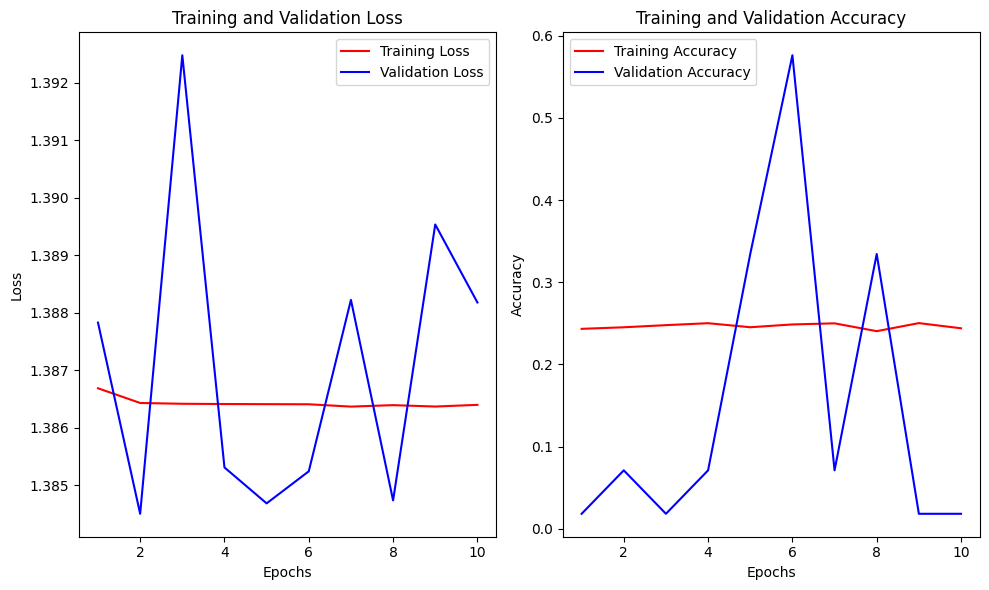

In [55]:
# access the loss and accuracy history
loss = lstm_history.history["loss"]
accuracy = lstm_history.history["accuracy"]

# access validation loss and accuracy
val_loss = lstm_history.history.get("val_loss")
val_accuracy = lstm_history.history.get("val_accuracy")

# creating a list of epochs for the x-axis
epochs = range(1, len(loss) + 1)

# plotting the figure size
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)

# plotting training loss
plt.plot(epochs, loss, "r", label = "Training Loss")
if val_loss:
    plt.plot(epochs, val_loss, "b", label = "Validation Loss")

# labelling the plot
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# plotting the figure size
plt.subplot(1, 2, 2)

# plotting training accuracy
plt.plot(epochs, accuracy, "r", label = "Training Accuracy")
if val_accuracy:
    plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")

# labelling the plots
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# displaying the visuals
plt.tight_layout()
plt.show()

## 7.2 GRUs

In [56]:
"""
(Gated Recurrent Units) GRUs are a "modified" version of LSTM. It passes along it's internal state at each time step.

Unlike LSTMs, GRUs have two gates: Reset gate 
                                   Update gate
                                 
"""

'\n(Gated Recurrent Units) GRUs are a "modified" version of LSTM. It passes along it\'s internal state at each time step.\n\nUnlike LSTMs, GRUs have two gates: Reset gate \n                                   Update gate\n                                 \n'

In [57]:
"""
Procedure will still be the same as LSTM only that GRU method will be used here
"""
# instantianting the model 
gru_model = Sequential()

# constructing a neural network in embedding layer
gru_model.add(Embedding(input_dim = 95000, output_dim = 64))

# lstm layer, dense layer, output layer
gru_model.add(GRU(128, activation = "relu"))  
gru_model.add(Dense(64, activation ="relu"))
gru_model.add(Dense(4, activation = "softmax"))

# Compiling the model
gru_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

# training the model
gru_history = gru_model.fit(X_train_balance, y_train_balance_encoded, epochs = 10, batch_size = 64, \
                            validation_data=(X_test, y_test_encoded))

Epoch 1/10
271/271 [==============================] - 57s 205ms/step - loss: 1.3867 - accuracy: 0.2437 - val_loss: 1.3847 - val_accuracy: 0.3344
Epoch 2/10
271/271 [==============================] - 57s 212ms/step - loss: 1.3864 - accuracy: 0.2452 - val_loss: 1.3892 - val_accuracy: 0.0711
Epoch 3/10
271/271 [==============================] - 54s 199ms/step - loss: 1.3864 - accuracy: 0.2479 - val_loss: 1.3819 - val_accuracy: 0.5763
Epoch 4/10
271/271 [==============================] - 55s 205ms/step - loss: 1.3864 - accuracy: 0.2450 - val_loss: 1.3858 - val_accuracy: 0.5763
Epoch 5/10
271/271 [==============================] - 51s 187ms/step - loss: 1.3864 - accuracy: 0.2448 - val_loss: 1.3869 - val_accuracy: 0.0711
Epoch 6/10
271/271 [==============================] - 50s 183ms/step - loss: 1.3864 - accuracy: 0.2456 - val_loss: 1.3871 - val_accuracy: 0.0182
Epoch 7/10
271/271 [==============================] - 59s 217ms/step - loss: 1.3864 - accuracy: 0.2461 - val_loss: 1.3867 - val_ac

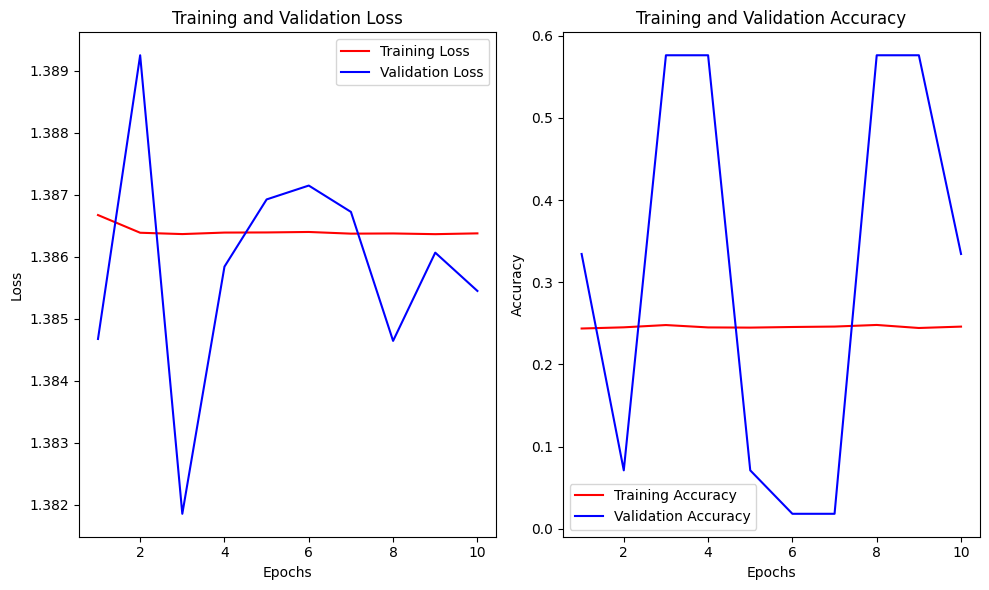

In [58]:
# access the loss and accuracy history
loss = gru_history.history["loss"]
accuracy = gru_history.history["accuracy"]

# access validation loss and accuracy 
val_loss = gru_history.history.get("val_loss")
val_accuracy = gru_history.history.get("val_accuracy")

# creating a list of epochs for the x-axis
epochs = range(1, len(loss) + 1)

# plotting training loss
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, "r", label = "Training Loss")
if val_loss:
    plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, "r", label = "Training Accuracy")
if val_accuracy:
    plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## 7.3 Textblob (Polarity)

In [59]:
# converting the tweet column to strings
df["tweet"] = df["tweet"].astype(str)

# >1 positive, <1 negative and 1 for neutral
df["polarity"] = df["tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment_textblob"] = df["polarity"].apply(lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral"))

# display the results
df.head(5)

,tweet,brand,emotion,tweet_numeric,brand_numeric,emotion_numeric,polarity,sentiment_textblob
0,"['wesley83', '3g', 'iphone', '3', 'hr', 'tweet...",iPhone,Negative emotion,"[5172, 487, 9, 61, 1978, 515, 1079, 13, 752, 4...",8,1,-0.200000,negative
1,"['jessedee', 'know', 'fludapp', 'awesome', 'ip...",iPad or iPhone App,Positive emotion,"[5173, 58, 5174, 94, 6, 9, 15, 948, 1979, 89, ...",7,3,0.466667,positive
2,"['swonderlin', 'wait', 'ipad', '2', 'also', 's...",iPad,Positive emotion,"[5175, 170, 6, 11, 165, 300, 1, 0, 0, 0, 0, 0,...",6,3,0.000000,neutral
3,"['sxsw', 'hope', 'year', 'festival', 'crashy',...",iPad or iPhone App,Negative emotion,"[1, 250, 68, 461, 3479, 68, 9, 15, 1, 0, 0, 0,...",7,1,0.000000,neutral
4,"['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",Google,Positive emotion,"[1262, 53, 400, 1532, 1, 59, 56, 5, 721, 1263,...",3,3,0.800000,positive


positive    4457
neutral     3799
negative     815
Name: sentiment_textblob, dtype: int64


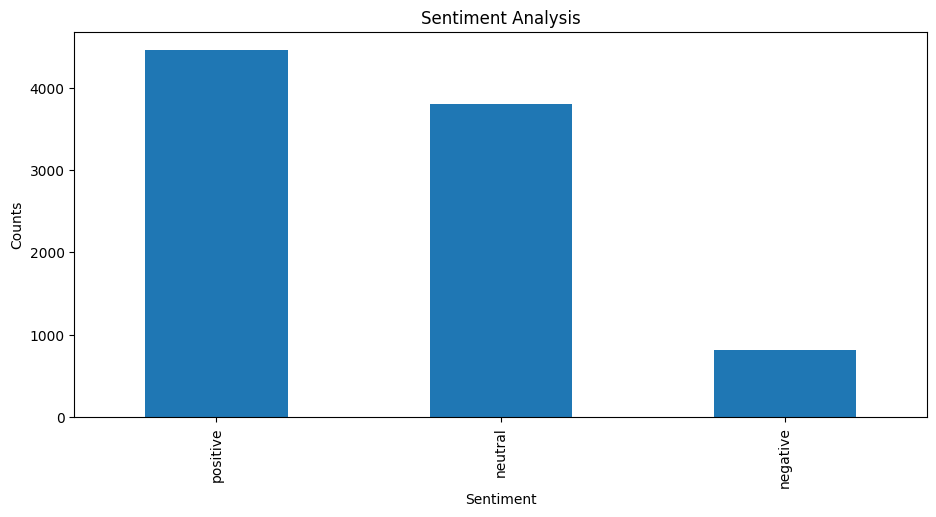

In [60]:
# plotting the figure size
plt.subplots(figsize= (11, 5))

# plotting the bar plot
df["sentiment_textblob"].value_counts().plot(kind = "bar")

# labelling the plot
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")

# Show the value counts
print(df["sentiment_textblob"].value_counts())

# display the visual
plt.show()

## 7.4 Neural Network 

In [61]:
# defining the model
model = models.Sequential()

# adding input layer
model.add(layers.Dense(units = 100, activation = "relu", input_shape = (100,)))

# adding hidden layers
model.add(layers.Dense(units = 64, activation = "relu"))
model.add(layers.Dense(units = 32, activation = "relu"))

# adding output layer with appropriate units and activation function
model.add(layers.Dense(units = 4, activation = "softmax"))

# compiling the model
model.compile(optimizer=optimizers.Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

# fitting the model
model.fit(X_train_balance, y_train_balance_encoded, batch_size=32, epochs=20)

# summary of the model
model.summary()

# training the model
history = model.fit(X_train_balance, y_train_balance_encoded, epochs = 20, batch_size = 32)

# displaying training loss
train_loss = history.history["loss"]
epochs = range(1, len(train_loss) + 1)

Epoch 1/20
542/542 [==============================] - 2s 3ms/step - loss: 20.0232 - accuracy: 0.3558
Epoch 2/20
542/542 [==============================] - 2s 3ms/step - loss: 3.9257 - accuracy: 0.4256
Epoch 3/20
542/542 [==============================] - 1s 3ms/step - loss: 2.2239 - accuracy: 0.4488
Epoch 4/20
542/542 [==============================] - 2s 3ms/step - loss: 1.5669 - accuracy: 0.4822
Epoch 5/20
542/542 [==============================] - 1s 3ms/step - loss: 1.3279 - accuracy: 0.4997
Epoch 6/20
542/542 [==============================] - 1s 3ms/step - loss: 1.2382 - accuracy: 0.5092
Epoch 7/20
542/542 [==============================] - 1s 3ms/step - loss: 1.1402 - accuracy: 0.5211
Epoch 8/20
542/542 [==============================] - 2s 3ms/step - loss: 1.1515 - accuracy: 0.5135
Epoch 9/20
542/542 [==============================] - 1s 3ms/step - loss: 1.1213 - accuracy: 0.5178
Epoch 10/20
542/542 [==============================] - 1s 3ms/step - loss: 1.0915 - accuracy: 0.519

# 8. Evaluation

Although the most frequent words for both positive and negative are focused on technology (sxsw), products (apple, iphone), and social media activities (mention, rt(retweet)), their is some differences. </br>
</br>
Frequent positive words (which are not in the list of negative words): great and good shows satisfactory and positive sentiments. Frequent negative words (which are not in the list of positive words): quot (argument) and think shows unsatisfactory. </br>
</br>
But the BIGGEST INDICATOR here is that there are 4457 positive tweets and 815 tweets. This shows that most tweets expressed favour or satisfactory in the products. Negative ones although at the minority shows that some twitter users were critical about the products. </br>
</br>
An accuracy of 68% shows 68% of the models predictions were made correctly.

# 9. Recommendations

The stakeholders should: </br>
1. Leverage sentiment analysis models. They should improve the areas which lead to negative sentiments by identifying specific issues mentioned in the negative sentiment tweets and priotize their resolution.
2. Uphold positive ones. They should identify the positive tweets and feedback and capitalize on them hence use them to make progress.
3. Brand promotion. Share positive sentiment and customer success stories on twitter and marketing channels to bolster brand awareness and trust.

# 10. Conclusions

Celebrate Positive Interactions: Positive sentiment tweets often mention words like great and good. Brands should acknowledge and celebrate these positive interactions. Sharing such experiences can build brand loyalty and trust. </br>
</br>
Improve Communication: The analysis reveals that clear and effective communication is essential. Customers often express negative sentiments when they feel uninformed or frustrated. Brands should focus on enhancing their communication strategies. </br>
</br>
Enhance Customer Service: in the CrowdFlower brands and products sentiment analysis, customer service plays a pivotal role. Addressing customer service concerns mentioned in tweets can significantly improve overall sentiment. Prompt and helpful responses can turn negative sentiment into positive experiences.

# 11. Challenges

a. Data is way limited. Datasets should be diverse. </br>
b. Quite a challenge developing NLP Models that accuately align tweets with specific emotions. </br>
c. Scaling the solution for sentiment analysis and still maintain brand alignment with evolving emotions.